<a href="https://colab.research.google.com/github/AhmedRezaShams/Python/blob/main/Final_Mamun_sir.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
#a)
data = pd.read_csv("/content/Customers211.csv")



In [ ]:
#b)
data.fillna(data.mean(numeric_only=True).round(1), inplace=True)

#For median:
data.fillna(data.median(numeric_only=True).round(1), inplace=True)
data. replace(np. nan,0)

print(data)

     ID   Name   Gender   PO BOX  Email   CNIC  DOB  Registered_Age  Mobile  \
0   1001      2        1       8       1     1    0            30.0       2   
1   1002      1        1       2       0     2    1            25.0       3   
2   1003     23        0       1      22     3   13            15.0       4   
3   1004     12        0       5      11     4    4             8.0       1   
4   1005      4        1       4       3     5    6             8.0       5   
5   1006     13        1       5      12     6    8             9.0       6   
6   1007      3        1       6       2     7    5            12.0       7   
7   1008      8        1       7       7     8    9            14.0       8   
8   1009     29        0       9      27    29   10            20.0       9   
9   1010     24        1       2      23    10   11            23.0      10   
10  1011     17        1       1      16    11   12            20.0      11   
11  1012      6        1       5       5    12   14 

In [ ]:
#c)
categorical_cols = data.select_dtypes(include=["object"]).columns
encoder = LabelEncoder()
for col in categorical_cols:
    data[col] = encoder.fit_transform(data[col])

In [ ]:
#d)
from pydantic import BaseModel


class User(BaseModel):
    id: int
    name: str = 'Name'

    class Config:
        orm_mode = True

In [ ]:
X = data.drop("Religion", axis=1)
y = data["Religion"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=True)

In [ ]:
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation="relu"))
model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

In [ ]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=2)

Epoch 1/50
1/1 - 1s - loss: 60.5360 - accuracy: 0.0833 - 1s/epoch - 1s/step
Epoch 2/50
1/1 - 0s - loss: 50.0100 - accuracy: 0.0833 - 8ms/epoch - 8ms/step
Epoch 3/50
1/1 - 0s - loss: 39.6023 - accuracy: 0.0833 - 8ms/epoch - 8ms/step
Epoch 4/50
1/1 - 0s - loss: 29.3125 - accuracy: 0.0833 - 13ms/epoch - 13ms/step
Epoch 5/50
1/1 - 0s - loss: 19.4016 - accuracy: 0.0833 - 11ms/epoch - 11ms/step
Epoch 6/50
1/1 - 0s - loss: 13.0617 - accuracy: 0.0833 - 9ms/epoch - 9ms/step
Epoch 7/50
1/1 - 0s - loss: 8.1280 - accuracy: 0.0833 - 9ms/epoch - 9ms/step
Epoch 8/50
1/1 - 0s - loss: 7.2006 - accuracy: 0.0833 - 8ms/epoch - 8ms/step
Epoch 9/50
1/1 - 0s - loss: 5.2767 - accuracy: 0.0833 - 7ms/epoch - 7ms/step
Epoch 10/50
1/1 - 0s - loss: 2.5387 - accuracy: 0.0833 - 7ms/epoch - 7ms/step
Epoch 11/50
1/1 - 0s - loss: -4.4686e-01 - accuracy: 0.0417 - 7ms/epoch - 7ms/step
Epoch 12/50
1/1 - 0s - loss: -3.3042e+00 - accuracy: 0.0417 - 7ms/epoch - 7ms/step
Epoch 13/50
1/1 - 0s - loss: -6.0888e+00 - accuracy: 0.

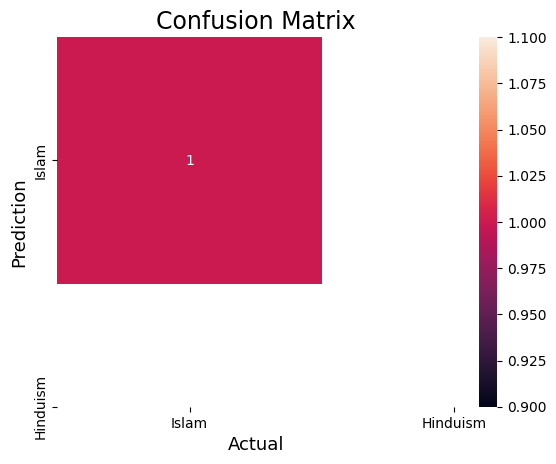

In [ ]:
#e)

#Import the necessary libraries
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

#Create the NumPy array for actual and predicted labels.
actual = np.array(
['Religion'])
predicted = np.array(
['Religion'])

#compute the confusion matrix.
cm = confusion_matrix(actual,predicted)

#Plot the confusion matrix.
sns.heatmap(cm,
			annot=True,
			fmt='g',
			xticklabels=['Islam','Hinduism'],
			yticklabels=['Islam','Hinduism'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()
